In [ ]:
# 코스트
# 정규화 매개변수. 오차에 대해서 패널티를 주는 것
# C를 크게 주면 학습이 잘 되지만 과대적합의 위험이 있음

In [ ]:
# 감마
# 샘플이 영향력을 행사하는 정도를 조절
# 감마도 너무 크면 과대적합의 위험이 있음

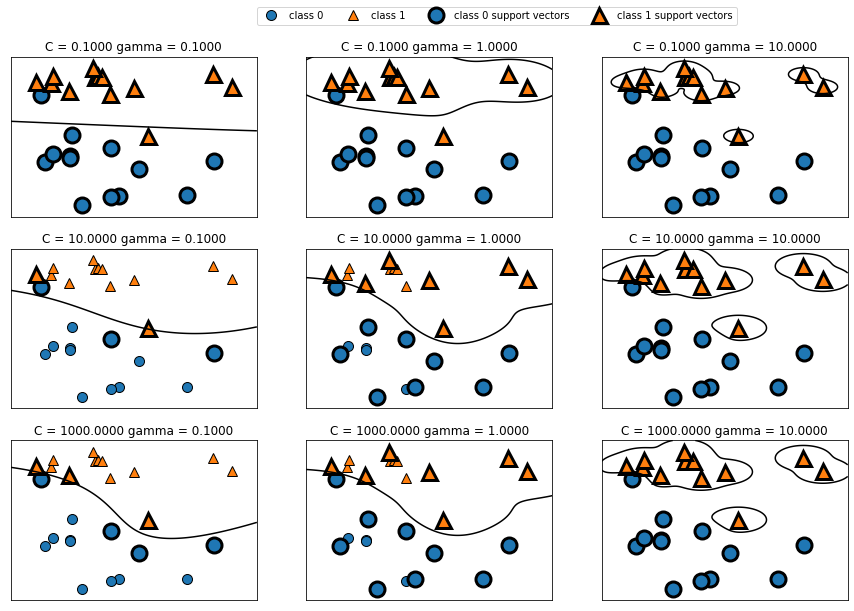

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import mglearn

fig, axes = plt.subplots(3,3,figsize=(15,10))

# 코스트 값은 10의 -1승, 10, 10의 3승
# 감마 값은 0.1, 1, 10
for ax, C in zip(axes, [-1, 1, 3]):
    for a, gamma in zip(ax, [-1, 0, 1]):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0,0].legend(["class 0", "class 1", "class 0 support vectors", "class 1 support vectors"], ncol=4, loc=(1,1.2))

In [ ]:
# cost(교차검증)
# customer 데이터셋

In [3]:
import pandas as pd
df = pd.read_csv("/Users/ian/Desktop/Study/data/customer/customer.csv")

cols = df.columns[:-1]
X = df[cols]
y = df['Churn']
y.value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [4]:
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X,y)
X_samp = pd.DataFrame(data=X_sample, columns=cols)
y_samp = pd.DataFrame(data=y_sample, columns=["Churn"])
df_samp = pd.concat([X_samp, y_samp], axis=1)
df_samp["Churn"].value_counts()

0    483
1    483
Name: Churn, dtype: int64

In [5]:
X = df_samp[cols]
y = df_samp['Churn']

<AxesSubplot:>

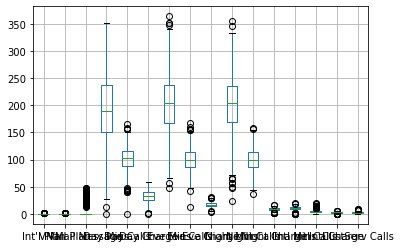

In [6]:
X.boxplot()

<AxesSubplot:>

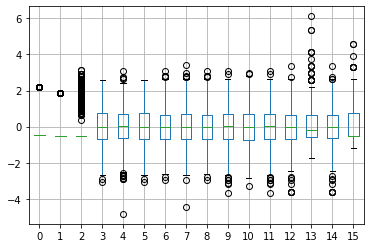

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = pd.DataFrame(scaler.transform(X))

X_scaled.boxplot()

In [8]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

svm = SVC()
n_estimators = 10 # 모형 개수 10개
model = BaggingClassifier(base_estimator=svm, n_estimators=n_estimators,
 max_samples=1/n_estimators, n_jobs=2)

In [9]:
import numpy as np
import math
from sklearn.model_selection import cross_val_score

costs = np.logspace(-10, 3, 14)
scores = []
for c in costs:
    model.base_estimator.C = c
    this_scores = cross_val_score(model, X_scaled, y, n_jobs=2, cv=3) # 교차검증에 스케일링된 데이터 넣기
    m = np.mean(this_scores)
    print(c, '==>', m)
    scores.append(m)

1e-10 ==> 0.5579710144927535
1e-09 ==> 0.5
1e-08 ==> 0.5734989648033126
1e-07 ==> 0.5652173913043478
1e-06 ==> 0.5693581780538303
1e-05 ==> 0.5
0.0001 ==> 0.5
0.001 ==> 0.6573498964803313
0.01 ==> 0.5
0.1 ==> 0.6262939958592132
1.0 ==> 0.7857142857142857
10.0 ==> 0.8002070393374741
100.0 ==> 0.7991718426501034
1000.0 ==> 0.8115942028985508


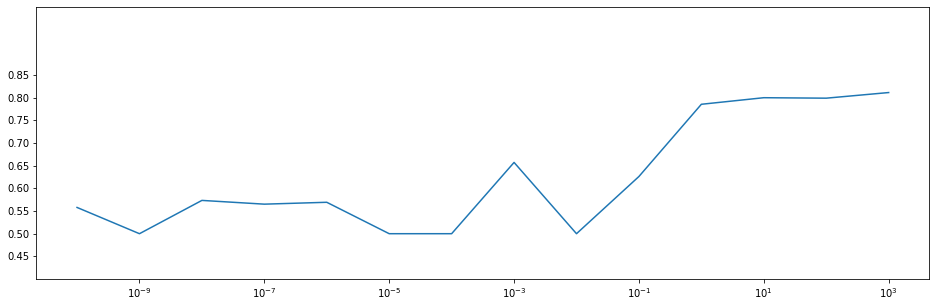

In [10]:
plt.rcParams["figure.figsize"]=(16,5)
plt.semilogx(costs, scores) # x축이 너무 값이 크니까  로그 단위로 표시
locs, labels = plt.yticks()
plt.yticks(locs)
plt.ylim(0.4, 1)
plt.show()

In [ ]:
# 스케일링

<AxesSubplot:>

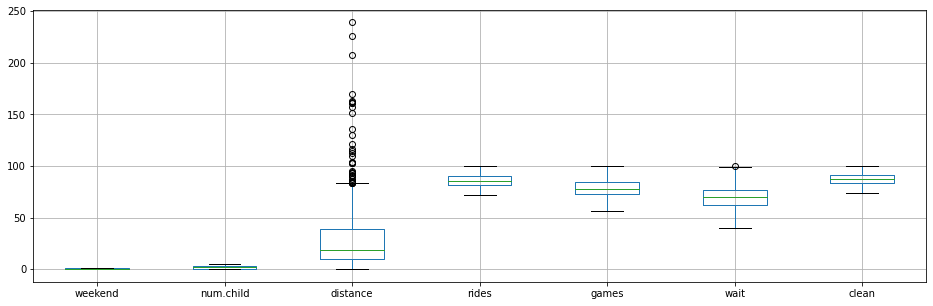

In [12]:
df = pd.read_csv("/Users/ian/Desktop/Study/data/rides/rides2.csv")
cols = ['weekend', 'num.child', 'distance', 'rides', 'games', 'wait', 'clean']
X = df[cols]

X.boxplot()

<AxesSubplot:>

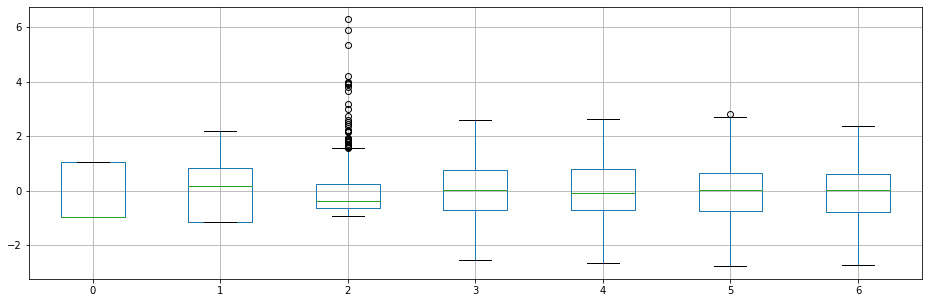

In [13]:
from sklearn.preprocessing import StandardScaler

# 평균 0, 표준편차 1로 만드는 방법으로 가장 일반적임
# 규칙이 중요한 의사결정나무 모형에는 잘 맞지 않음
# 클러스터링, SVM, 신경망에 많이 씀
# 아웃라이어의 영향이 큼

ss = StandardScaler()
ss.fit(X)
df_ss = pd.DataFrame(ss.transform(X))
df_ss.boxplot()

<AxesSubplot:>

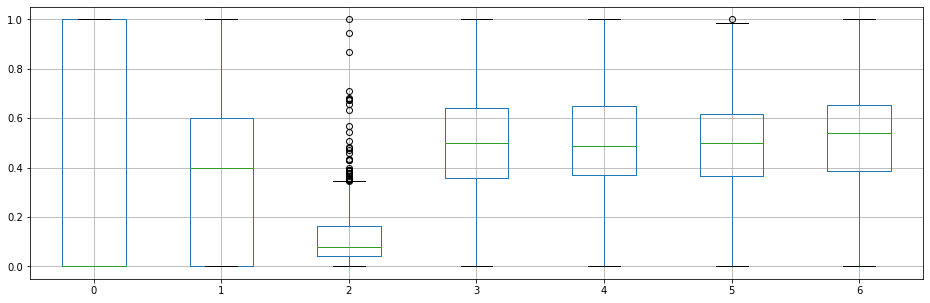

In [14]:
from sklearn.preprocessing import MinMaxScaler

# 0~1 정규화. 최소값을 0 최대값을 1로 맞춰놓고 스케일링하는 것
# 범주형 변수에는 맞지 않음
# 아웃라이어의 영향이 큼

mms = MinMaxScaler()
mms.fit(X)
df_mms = pd.DataFrame(mms.transform(X))
df_mms.boxplot()

In [16]:
print(mms.data_max_)
print(mms.data_min_)

[  1.          5.        239.1921337 100.        100.        100.
 100.       ]
[ 0.          0.          0.52672279 72.         57.         40.
 74.        ]


In [17]:
X2 = mms.transform(X)
print(X2)
print(mms.inverse_transform(X2)) # 원래 값을 되돌려주는 백스케일링

[[1.         0.         0.47816538 ... 0.37209302 0.33333333 0.57692308]
 [1.         0.4        0.1109812  ... 0.48837209 0.6        0.5       ]
 [0.         0.2        0.26302199 ... 0.53488372 0.5        0.53846154]
 ...
 [0.         0.4        0.18708483 ... 0.81395349 0.75       0.73076923]
 [0.         0.6        0.11129245 ... 0.60465116 0.66666667 0.53846154]
 [0.         0.2        0.15872446 ... 0.72093023 0.61666667 0.42307692]]
[[  1.           0.         114.6482595  ...  73.          60.
   89.        ]
 [  1.           2.          27.01409697 ...  78.          76.
   87.        ]
 [  0.           1.          63.3009752  ...  80.          70.
   88.        ]
 ...
 [  0.           2.          45.17740171 ...  92.          85.
   93.        ]
 [  0.           3.          27.08838041 ...  83.          80.
   88.        ]
 [  0.           1.          38.40876006 ...  88.          77.
   85.        ]]


<AxesSubplot:>

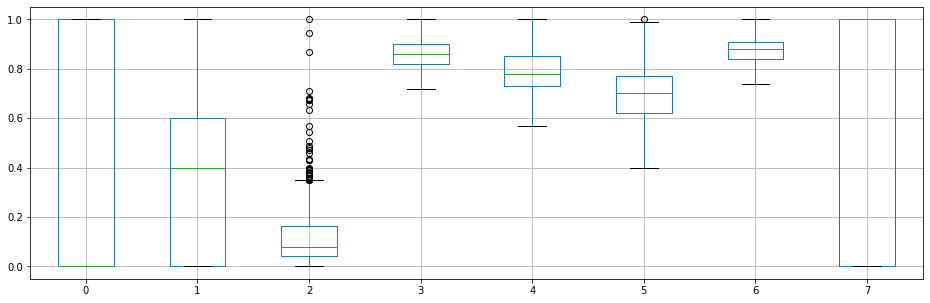

In [19]:
from sklearn.preprocessing import MaxAbsScaler

# 데이터에 음수가 있을 경우 절대값으로 0~1로 스케일링

mas = MaxAbsScaler()
mas.fit(df)
df_mas = pd.DataFrame(mas.transform(df))
df_mas.boxplot()

<AxesSubplot:>

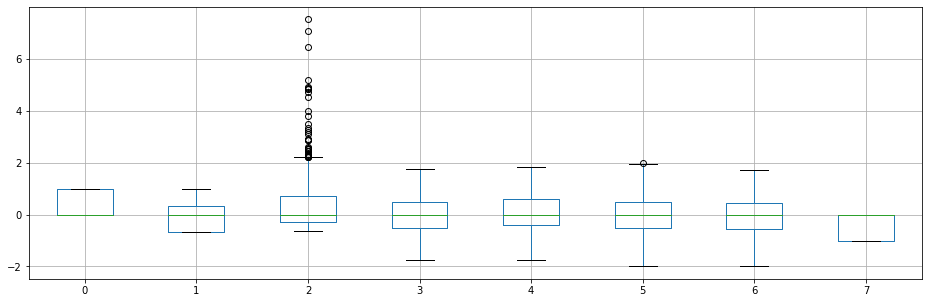

In [20]:
from sklearn.preprocessing import RobustScaler

# 아웃라이어의 영향력을 줄여줌

rs = RobustScaler()
rs.fit(df)
df_rs = pd.DataFrame(rs.transform(df))
df_rs.boxplot()

In [ ]:
# 변수의 중요도

In [2]:
import pandas as pd

df = pd.read_csv("/Users/ian/Desktop/Study/data/customer/customer.csv")

cols = df.columns[0:-1]
X = df[cols]
y = df["Churn"]
y.value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [3]:
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X,y)
X_samp = pd.DataFrame(data = X_sample, columns = cols)
y_samp = pd.DataFrame(data = y_sample, columns = ["Churn"])
df_samp = pd.concat([X_samp, y_samp], axis=1)
df_samp["Churn"].value_counts()

0    483
1    483
Name: Churn, dtype: int64

In [4]:
X = df_samp[cols]
y = df_samp["Churn"]

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = pd.DataFrame(scaler.transform(X))

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import pandas as pd
from sklearn.svm import SVC
import numpy as np

svm = SVC(random_state=0).fit(X,y)
# 모형을 만드는데 사용된 변수들의 특성 중요도 계산 - 트리 알고리즘에 적합
result = permutation_importance(svm, X, y, n_repeats=10, random_state=0, n_jobs=-1)
importances = np.array(list(zip(X.columns, result.importances_mean)))
df2 = pd.DataFrame(importances)
df2

,0,1
0,Int'l Plan,0.0
1,VMail Plan,0.0
2,VMail Message,0.0023809523809523725
3,Day Mins,0.15186335403726708
4,Day Calls,0.0025879917184264854
5,Day Charge,0.00041407867494823724
6,Eve Mins,0.052380952380952375
7,Eve Calls,0.002277432712215344
8,Eve Charge,0.0008281573498964967
9,Night Mins,0.0025879917184264967


In [8]:
# 위의 변수들의 중요도를 내림차순으로 정렬
# 기울기, r-value 등이 있던 회귀분석, 로지스틱 회귀분석, 규칙이 나오는 의사결정나무와 다르게
# 사례기반추론, 인공신경망, SVM은 설명력이 떨어짐
sorted_idx = result.importances_mean.argsort()
print(importances[sorted_idx[::-1]])

[['Day Mins' '0.15186335403726708']
 ['Eve Mins' '0.052380952380952375']
 ['Intl Mins' '0.003209109730848847']
 ['Night Calls' '0.0026915113871635588']
 ['Night Mins' '0.0025879917184264967']
 ['Day Calls' '0.0025879917184264854']
 ['VMail Message' '0.0023809523809523725']
 ['Eve Calls' '0.002277432712215344']
 ['CustServ Calls' '0.001138716356107683']
 ['Intl Calls' '0.001138716356107683']
 ['Intl Charge' '0.0010351966873706209']
 ['Eve Charge' '0.0008281573498964967']
 ['Day Charge' '0.00041407867494823724']
 ['Night Charge' '0.0']
 ['VMail Plan' '0.0']
 ["Int'l Plan" '0.0']]


In [9]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

svc = SVC(kernel="linear")
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X,y)

print(rfecv.grid_scores_)
print(rfecv.n_features_)
print(rfecv.support_)
print(rfecv.ranking_)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(


[[0.6185567  0.61139896 0.62176166 0.60621762 0.59067358]
 [0.69072165 0.61139896 0.65803109 0.68911917 0.69948187]
 [0.69072165 0.68393782 0.68393782 0.69948187 0.70984456]
 [0.67525773 0.69430052 0.68911917 0.69430052 0.72020725]
 [0.71134021 0.65803109 0.69430052 0.69948187 0.75647668]
 [0.76804124 0.65803109 0.75129534 0.72020725 0.77720207]
 [0.77319588 0.65803109 0.76165803 0.78756477 0.76683938]
 [0.76804124 0.65803109 0.76165803 0.79274611 0.76683938]
 [0.7628866  0.71502591 0.76683938 0.79274611 0.77720207]
 [0.7628866  0.71502591 0.76165803 0.80310881 0.78238342]
 [0.76804124 0.71502591 0.75647668 0.79274611 0.77720207]
 [0.7628866  0.71502591 0.75129534 0.79274611 0.77202073]
 [0.77835052 0.71502591 0.76683938 0.79274611 0.76683938]
 [0.77835052 0.70984456 0.75129534 0.80310881 0.77720207]
 [0.76804124 0.71502591 0.76165803 0.80310881 0.77720207]
 [0.77319588 0.71502591 0.75129534 0.80310881 0.77720207]]
10
[ True  True  True  True False False False False  True False False  

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


In [10]:
print(X.columns[rfecv.support_]) # 선택된 변수들
print(X.columns.difference(X.columns[rfecv.support_])) # 선택되지 않은 변수들

Index(['Int'l Plan', 'VMail Plan', 'VMail Message', 'Day Mins', 'Eve Charge',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls'],
      dtype='object')
Index(['Day Calls', 'Day Charge', 'Eve Calls', 'Eve Mins', 'Night Calls',
       'Night Mins'],
      dtype='object')


In [12]:
df2 = pd.DataFrame(list(zip(X.columns, rfecv.grid_scores_)), columns=["변수명","순위"])
df2

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


,변수명,순위
0,Int'l Plan,"[0.6185567010309279, 0.6113989637305699, 0.621..."
1,VMail Plan,"[0.6907216494845361, 0.6113989637305699, 0.658..."
2,VMail Message,"[0.6907216494845361, 0.6839378238341969, 0.683..."
3,Day Mins,"[0.6752577319587629, 0.694300518134715, 0.6891..."
4,Day Calls,"[0.711340206185567, 0.6580310880829016, 0.6943..."
5,Day Charge,"[0.7680412371134021, 0.6580310880829016, 0.751..."
6,Eve Mins,"[0.7731958762886598, 0.6580310880829016, 0.761..."
7,Eve Calls,"[0.7680412371134021, 0.6580310880829016, 0.761..."
8,Eve Charge,"[0.7628865979381443, 0.7150259067357513, 0.766..."
9,Night Mins,"[0.7628865979381443, 0.7150259067357513, 0.761..."


In [ ]:
# 데이터 처리에는 회귀분석과 분류, 클러스터링이 있음
# 분류에는 로지스틱 회귀분석, 의사결정나무, 사례기반추론, 인공신경망, svm이 있음

# (회귀분석에도 있긴 한데 잘 안씀)